# **Deep Dive Project - Group 10**
### Analyzing and Predicting California's Unemployment Rate Using Deep Learning

## Milestone 1:

In [ ]:
import numpy as np # numpy for computation
import pandas as pd  # pandas library for computation
import matplotlib.pyplot as plt   # for displaying output visualization in matplotlib
import seaborn as sns   # for displaying output visualization in seaborn
from sklearn.model_selection import train_test_split # for splitting the data
from sklearn.linear_model import LinearRegression # for linear regression classifier
from sklearn.metrics import mean_squared_error, r2_score # for computing mean square error and R-square error
from sklearn.preprocessing import StandardScaler   # for scaling the data
from sklearn.linear_model import Ridge # for ridge regression classifier
from sklearn.pipeline import make_pipeline # for making pipeline
from sklearn.tree import DecisionTreeRegressor # for decision tree regression classifier

#### Loading Dataset

In [ ]:
def getfile(location_pair,indict={}): #tries to get local version and then defaults to google drive version
    (loc,gdrive)=location_pair
    try:
        out=pd.read_csv(loc,*indict)
    except FileNotFoundError:
        print("local file not found; accessing Google Drive")
        loc = 'https://drive.google.com/uc?export=download&id='+gdrive.split('/')[-2]
        out=pd.read_csv(loc,*indict)
    return out

In [ ]:
fname=("Local Area Unemployment Statistics (LAUS).csv","https://drive.google.com/file/d/1PhDuxwfj42OqDN9XnLx56UbXgY5SNQTC/view?usp=sharing")
data = getfile(fname)
data.info()
data.head(5)

local file not found; accessing Google Drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203072 entries, 0 to 203071
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   _id                       203072 non-null  int64  
 1   Area Name                 203072 non-null  object 
 2   Area Type                 203072 non-null  object 
 3   Year                      203072 non-null  int64  
 4   Month                     203072 non-null  object 
 5   Date_Numeric              203072 non-null  object 
 6   Seasonally Adjusted(Y/N)  203072 non-null  object 
 7   Status                    203072 non-null  object 
 8   Labor Force               203072 non-null  int64  
 9   Employment                203072 non-null  int64  
 10  Unemployment              203072 non-null  int64  
 11  Unemployment Rate         203072 non-null  float64
 12  Benchmark                 203072 non-null  int64  
dtyp

,_id,Area Name,Area Type,Year,Month,Date_Numeric,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate,Benchmark
0,1,California,State,1976,January,01/1976,N,Final,9672362,8668016,1004346,10.4,2020
1,2,California,State,1976,January,01/1976,Y,Final,9774280,8875685,898595,9.2,2020
2,3,California,State,1976,February,02/1976,N,Final,9684440,8704564,979876,10.1,2020
3,4,California,State,1976,February,02/1976,Y,Final,9768885,8871553,897332,9.2,2020
4,5,California,State,1976,March,03/1976,N,Final,9689626,8776344,913282,9.4,2020


In [ ]:
data['Date_Numeric'] = pd.to_datetime(data['Date_Numeric'], format='%m/%Y')
data['Date'] = pd.to_datetime(data['Date_Numeric'], format='%Y')
#data.drop(['Year', 'Month'], axis=1, inplace=True)
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data['Benchmark'] = pd.to_datetime(data['Benchmark'], format='%Y')
data['Employment Rate']= np.round(data['Employment']/data['Labor Force'],2)
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203072 entries, 0 to 203071
Data columns (total 15 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   _id                       203072 non-null  int64         
 1   Area Name                 203072 non-null  object        
 2   Area Type                 203072 non-null  object        
 3   Year                      203072 non-null  datetime64[ns]
 4   Month                     203072 non-null  object        
 5   Date_Numeric              203072 non-null  datetime64[ns]
 6   Seasonally Adjusted(Y/N)  203072 non-null  object        
 7   Status                    203072 non-null  object        
 8   Labor Force               203072 non-null  int64         
 9   Employment                203072 non-null  int64         
 10  Unemployment              203072 non-null  int64         
 11  Unemployment Rate         203072 non-null  float64       
 12  Be

,_id,Area Name,Area Type,Year,Month,Date_Numeric,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate,Benchmark,Date,Employment Rate
0,1,California,State,1976-01-01,January,1976-01-01,N,Final,9672362,8668016,1004346,10.4,2020-01-01,1976-01-01,0.90
1,2,California,State,1976-01-01,January,1976-01-01,Y,Final,9774280,8875685,898595,9.2,2020-01-01,1976-01-01,0.91
2,3,California,State,1976-01-01,February,1976-02-01,N,Final,9684440,8704564,979876,10.1,2020-01-01,1976-02-01,0.90
3,4,California,State,1976-01-01,February,1976-02-01,Y,Final,9768885,8871553,897332,9.2,2020-01-01,1976-02-01,0.91
4,5,California,State,1976-01-01,March,1976-03-01,N,Final,9689626,8776344,913282,9.4,2020-01-01,1976-03-01,0.91


#### Pickle the Datasets

In [ ]:
# Create and pickle the debugging dataset
debugging_data = data.sample(frac=0.01, random_state=42)   # 1% of the original data
debugging_data.to_pickle('debugging_data.pkl')

# Create and pickle the working dataset
working_data = data.sample(frac=0.3, random_state=42)   # 30% of the original data
working_data.to_pickle('working_data.pkl')

# Pickle the original dataset
data.to_pickle('original_data.pkl')

#### Loading Pickled Datasets

In [ ]:
# Load the pickled datasets
debugging_data = pd.read_pickle('debugging_data.pkl')
working_data = pd.read_pickle('working_data.pkl')
original_data = pd.read_pickle('original_data.pkl')

## Milestone 2:

In [ ]:
# Selecting data for analysis
df = debugging_data

#### Data Visualization

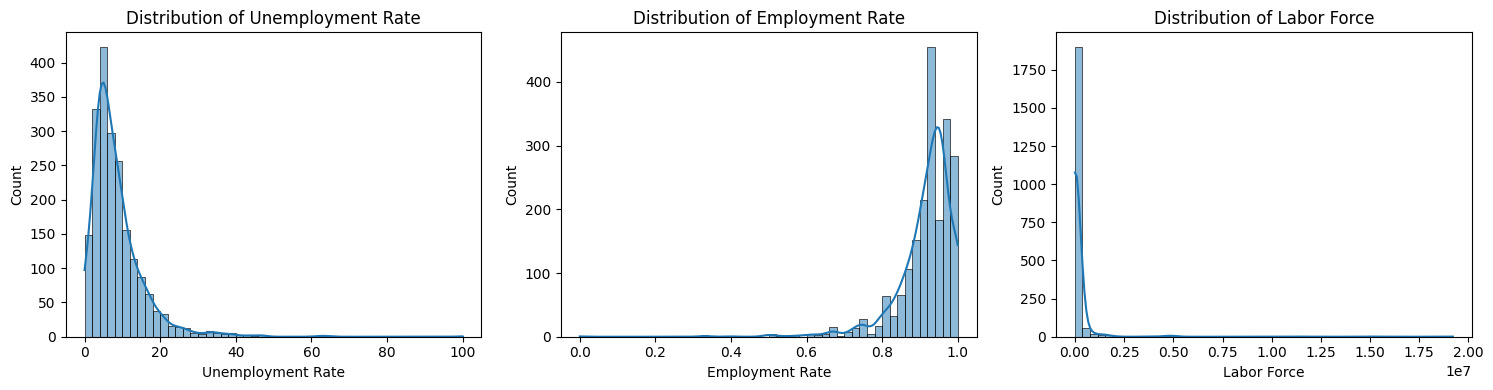

<Figure size 400x400 with 0 Axes>

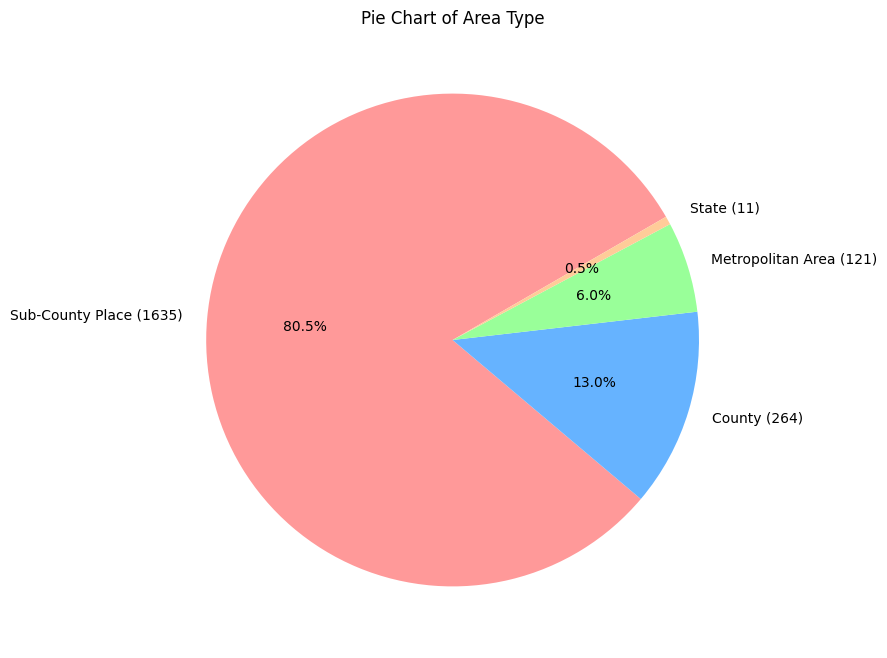

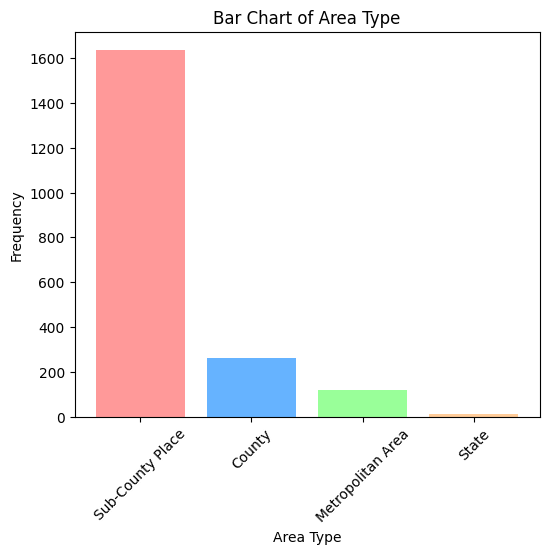

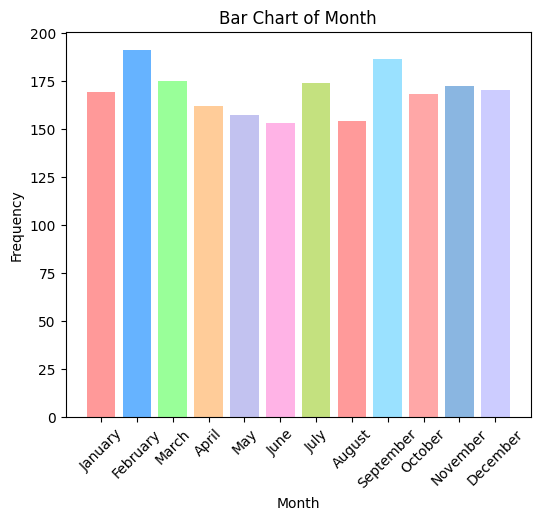

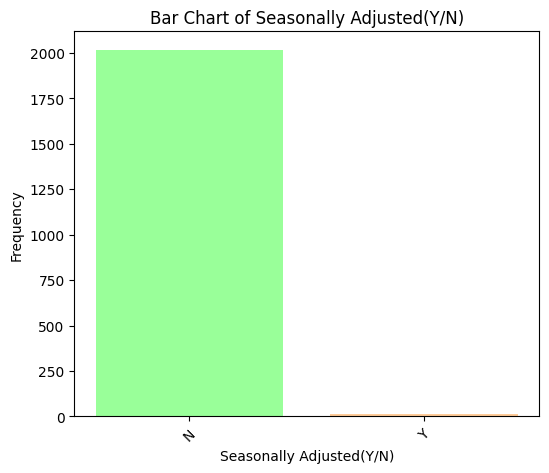

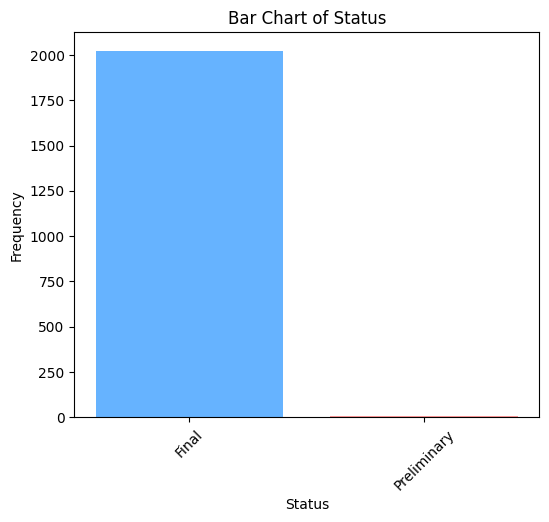

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 4))
sns.histplot(df['Unemployment Rate'], bins=50, ax=ax[0], kde=True)
ax[0].set_title("Distribution of Unemployment Rate")
ax[0].set_xlabel("Unemployment Rate")

sns.histplot(df['Employment Rate'], bins=50, ax=ax[1], kde=True)
ax[1].set_title("Distribution of Employment Rate")
ax[1].set_xlabel("Employment Rate")

sns.histplot(df['Labor Force'], bins=50, ax=ax[2], kde=True)
ax[2].set_title("Distribution of Labor Force")
ax[2].set_xlabel("Labor Force")

plt.tight_layout()
plt.show()

# Defining custom colors
custom_colors = {
    'Area Type': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'],
    'Month': ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0', '#ffb3e6', '#c4e17f', '#ff9a9a', '#9ae1ff', '#ffa7a7', '#8ab6e1', '#ccccff'],
    'Seasonally Adjusted(Y/N)': ['#99ff99', '#ffcc99'],
    'Status': ['#66b3ff', '#ff9999']
}

# For Pie charts
for column in (['Area Type']):
  plt.figure(figsize=(4,4))
  counts = df[column].value_counts()
  original_labels = counts.index.tolist()
  new_labels = [f"{label} ({count})" for label, count in zip(original_labels, counts)]
  sizes = counts.values
  plt.figure(figsize=(8, 8))
  plt.pie(sizes, labels=new_labels, autopct='%1.1f%%', startangle=30, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99'])
  plt.title(f'Pie Chart of {column}')
  plt.show()

# Define the correct order for months
month_order = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

# For Bar graphs
for column in (['Area Type','Month', 'Seasonally Adjusted(Y/N)', 'Status']):
  plt.figure(figsize=(6,5))
  counts = df[column].value_counts()
  if column == 'Month':
    counts = counts.reindex(month_order)
  plt.bar(counts.index, counts.values, color=custom_colors[column][:len(counts)])
  plt.title(f'Bar Chart of {column}')
  plt.xlabel(column)
  plt.ylabel('Frequency')
  plt.xticks(rotation=45)
  plt.show()

* **Unemployment Rate:** The histogram shows a highly skewed distribution with most values concentrated at the lower end, indicating a long tail for higher unemployment rates. This suggests potential imbalance where most areas experience lower unemployment, and a few have significantly high rates.
* **Employment Rate:** The distribution here is also skewed, with most values concentrated close to 1, indicating that high employment rates are common. This could present challenges in modeling due to low variability.
* **Labor Force:** The labor force distribution is similarly skewed with a concentration near the lower end, but with some extremely high values representing large labor force areas, possibly outliers that might need special handling or transformation.
* **Area Type:** The pie chart and bar chart indicate that most data points belong to "Sub-County Place" areas, with much smaller representations from "County" and other types. This imbalance could affect the analysis by potentially over-representing characteristics of sub-county places and under-representing those of counties or metropolitan areas.
* **Month:** While month-wise data is relatively balanced, as seen in the bar chart, some minor variation might impact monthly trends slightly, but overall, it appears fairly representative across months.
* **Seasonally Adjusted and Status:** There is a stark imbalance here, with "Final" status dominating and "Non-seasonally adjusted" data making up the majority. This may impact the analysis as it might introduce bias or affect robustness.

##### Trend Analysis over time

<ipython-input-9-d05af9a336ca>:10: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_resampled = numeric_df.resample('Y').mean()


<Figure size 1400x600 with 0 Axes>

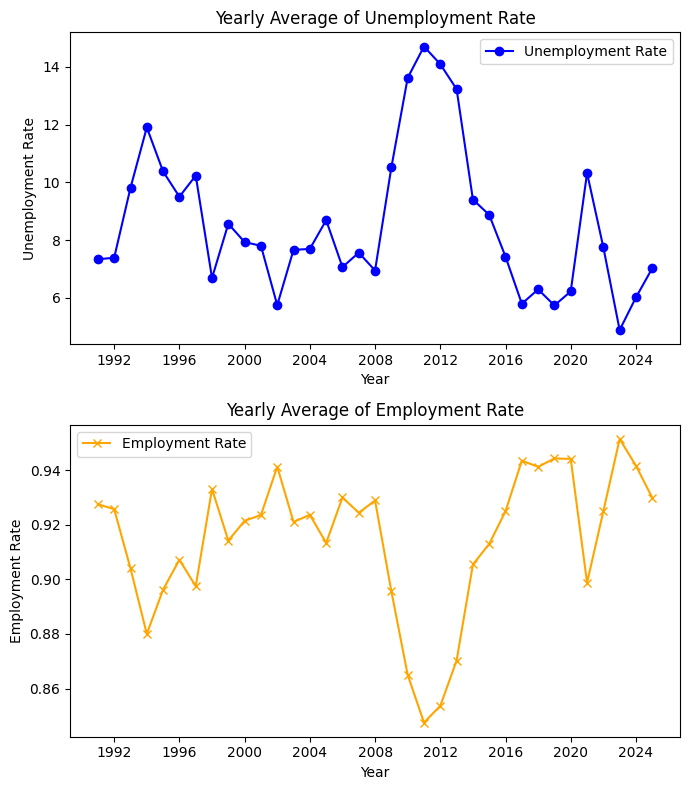

In [ ]:
plt.figure(figsize=(14, 6))

# Ensure 'Date' is set as the index
df.set_index('Date', inplace=True)

# Select only numeric columns for resampling
numeric_df = df[['Unemployment Rate', 'Employment Rate']]

# Resample by year and calculate the mean
df_resampled = numeric_df.resample('Y').mean()
df_resampled = df_resampled[df_resampled.index >= '1990']

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(7, 8))

# Plot for Unemployment Rate
axes[0].plot(df_resampled.index, df_resampled['Unemployment Rate'], color='blue', marker='o', label='Unemployment Rate')
axes[0].set_title("Yearly Average of Unemployment Rate")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Unemployment Rate")
axes[0].legend()

# Plot for Employment Rate
axes[1].plot(df_resampled.index, df_resampled['Employment Rate'], color='orange', marker='x', label='Employment Rate')
axes[1].set_title("Yearly Average of Employment Rate")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("Employment Rate")
axes[1].legend()

plt.tight_layout()
plt.show()

##### Correlation Matrix

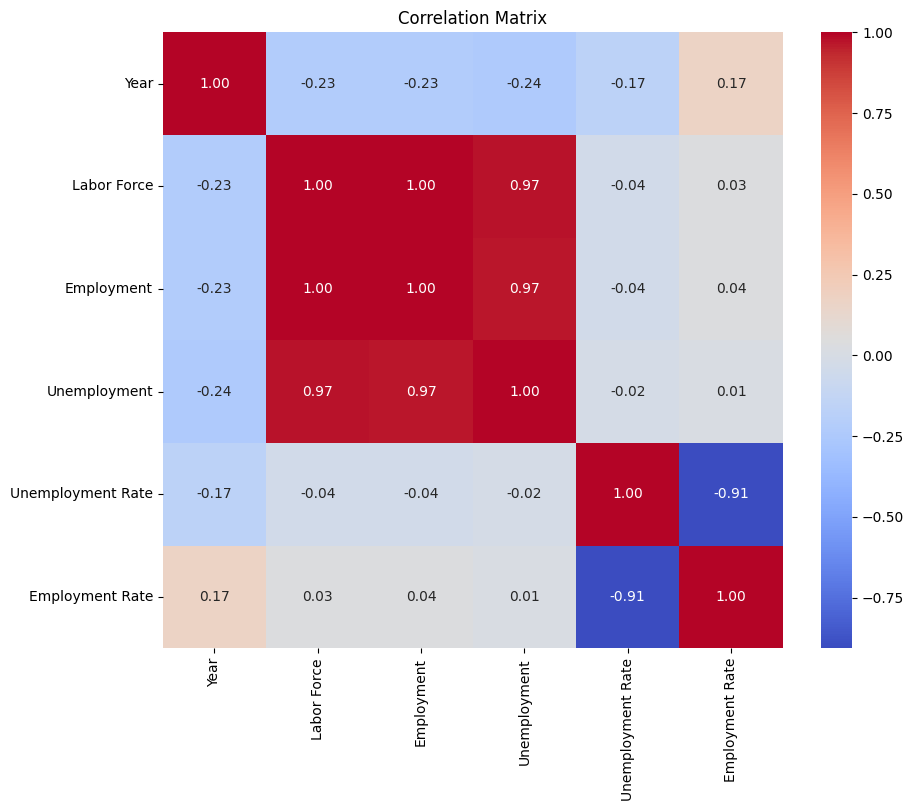

In [ ]:
# Calculating correlations for numerical fields
numeric_df = df[['Year', 'Labor Force', 'Employment', 'Unemployment', 'Unemployment Rate', 'Employment Rate']]
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

The heatmap shows strong positive correlations between "Labor Force" and "Employment" and "Unemployment" variables, as expected. However, there’s a weak negative correlation between "Unemployment Rate" and "Employment Rate," which could influence model accuracy. The high correlations among certain variables may require careful feature selection to avoid multicollinearity.

#### Handling Missing or Imbalanced Data

In [ ]:
# Check for missing values
missing_data = df.isnull().sum()
df['Employment Rate'].fillna(0, inplace=True)
print("Missing data per column:\n", missing_data)

# Basic Imbalance Check - Count by Seasonally Adjusted and Status
print("\nSeasonally Adjusted Counts:\n", df['Seasonally Adjusted(Y/N)'].value_counts())
print("\nStatus Counts:\n", df['Status'].value_counts())

Missing data per column:
 _id                          0
Area Name                    0
Area Type                    0
Year                         0
Month                        0
Date_Numeric                 0
Seasonally Adjusted(Y/N)     0
Status                       0
Labor Force                  0
Employment                   0
Unemployment                 0
Unemployment Rate            0
Benchmark                    0
Employment Rate             24
dtype: int64

Seasonally Adjusted Counts:
 Seasonally Adjusted(Y/N)
N    2016
Y      15
Name: count, dtype: int64

Status Counts:
 Status
Final          2025
Preliminary       6
Name: count, dtype: int64


<ipython-input-11-87dec7fe77b5>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Employment Rate'].fillna(0, inplace=True)


In [ ]:
#Updating the missing data
df.loc[:, 'Employment Rate'] = df['Employment Rate'].fillna(0)

#### Perform Linear Regression as Benchmark

In [ ]:
# Select necessary columns for linear regression
X = df.drop('Unemployment Rate', axis=1)
y = df['Unemployment Rate']

X = X.apply(pd.to_numeric, errors='coerce').fillna(0)

# Scaling the X data for processing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nTraining baseline Linear Regression model with scaling...")
# Train a baseline Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = model.score(X_test, y_test)

print(f"RMSE: {rmse:.2f}, R-squared: {r2:.2f}")


Training baseline Linear Regression model with scaling...
RMSE: 5.18, R-squared: 0.41


For the baseline model, we implemented a simple Linear Regression using the `Unemployment Rate` as the target variable. The feature set includes relevant columns like `Labor Force`, `Employment`, and `Unemployment`, which were preprocessed as follows:

1. **Data Cleaning:** To handle any non-numeric entries or missing values, we converted data to numeric format and filled NaN values with 0.

2. **Scaling:** StandardScaler was used to normalize the feature values, as linear regression models perform better with scaled data.

3. **Train-Test Split:** We split the data into training and testing sets in an 80-20 ratio to evaluate model performance.

4. **Model Training and Evaluation:** The Linear Regression model was trained on the scaled data, achieving an RMSE (Root Mean Squared Error) of 5.18 and an R-squared value of 0.41. The R-squared indicates that the model explains 41% of the variance in Unemployment Rate, providing a reasonable baseline for further improvements.

#### Perform Linear, Ridge and Decision Tree Regression

In [ ]:
# Selecting features and target variable
if 'Unemployment Rate' in df.columns:
    X = df.drop(columns=['Unemployment Rate'])
    y = df['Unemployment Rate']
else:
    print("No 'Unemployment Rate' column found")
    X = y = None

if X is not None:
    # Convert datetime columns to numeric
    for col in X.select_dtypes(include=['datetime64']).columns:
        X[col] = X[col].apply(lambda x: x.timestamp())

    # One-hot encoding to convert categorical variables
    X = pd.get_dummies(X, drop_first=True)

    #Linear Regression
    print("\nTraining baseline Linear Regression model...")
    linear_model = LinearRegression()
    linear_model.fit(X, y)
    y_pred_linear = linear_model.predict(X)
    mse_linear = mean_squared_error(y, y_pred_linear)
    r2_linear = r2_score(y, y_pred_linear)
    print(f"Linear Regression MSE: {mse_linear:.2f}, R2 Score: {r2_linear:.2f}")

    # Ridge Regression
    print("\nTraining baseline Ridge Regression model with scaling...")
    ridge_model = make_pipeline(StandardScaler(), Ridge(alpha=15.0))
    ridge_model.fit(X, y)
    y_pred_ridge = ridge_model.predict(X)
    mse_ridge = mean_squared_error(y, y_pred_ridge)
    r2_ridge = r2_score(y, y_pred_ridge)
    print(f"Ridge Regression (with scaling) MSE: {mse_ridge:.2f}, R2 Score: {r2_ridge:.2f}")

    #Decision Tree Regressor
    print("\nTraining baseline Decision Tree Regressor model...")
    tree_model = DecisionTreeRegressor(max_depth=5, random_state=42)
    tree_model.fit(X, y)
    y_pred_tree = tree_model.predict(X)
    mse_tree = mean_squared_error(y, y_pred_tree)
    r2_tree = r2_score(y, y_pred_tree)
    print(f"Decision Tree Regressor MSE: {mse_tree:.2f}, R2 Score: {r2_tree:.2f} \n\n")

    # Additional details about the tree
    n_leaves = tree_model.get_n_leaves()
    n_splits = tree_model.tree_.node_count - n_leaves  # Total nodes - leaves = splits
    print(f"Number of leaves in the Decision Tree: {n_leaves}")
    print(f"Number of splits in the Decision Tree: {n_splits}")

    # Sample predictions vs actual values
    print("\nSample Predictions vs. Actuals (Decision Tree):")
    print(pd.DataFrame({'Actual': y[:5], 'Predicted': y_pred_tree[:5]}))

else:
    print("Unable to proceed : Missing target variable.")



Training baseline Linear Regression model...
Linear Regression MSE: 1.79, R2 Score: 0.97

Training baseline Ridge Regression model with scaling...
Ridge Regression (with scaling) MSE: 2.11, R2 Score: 0.96

Training baseline Decision Tree Regressor model...
Decision Tree Regressor MSE: 4.89, R2 Score: 0.91 


Number of leaves in the Decision Tree: 29
Number of splits in the Decision Tree: 28

Sample Predictions vs. Actuals (Decision Tree):
            Actual  Predicted
Date                         
2014-11-01     0.0   3.588604
2014-08-01     1.5   3.588604
2011-11-01     7.0   6.919853
2010-09-01     9.6  10.475449
1992-07-01    16.2  15.986842


In this model evaluation, we applied three regression methods—Linear Regression, Ridge Regression, and Decision Tree Regression—to predict the `Unemployment Rate` based on various employment and labor force features.